## (A part of Big Data Analysis)

----

-----

# INSIGHTS FOR UDEMY COURSES DATASET

----

This dataset contains all course data for all subjects from Udemy

We will analyze this data using the Pandas, Matplotlib Library.

 ----

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"dataset.csv")

In [3]:
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


----

### 1. What are all different subjects for which Udemy is offering courses ?

In [4]:
data.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

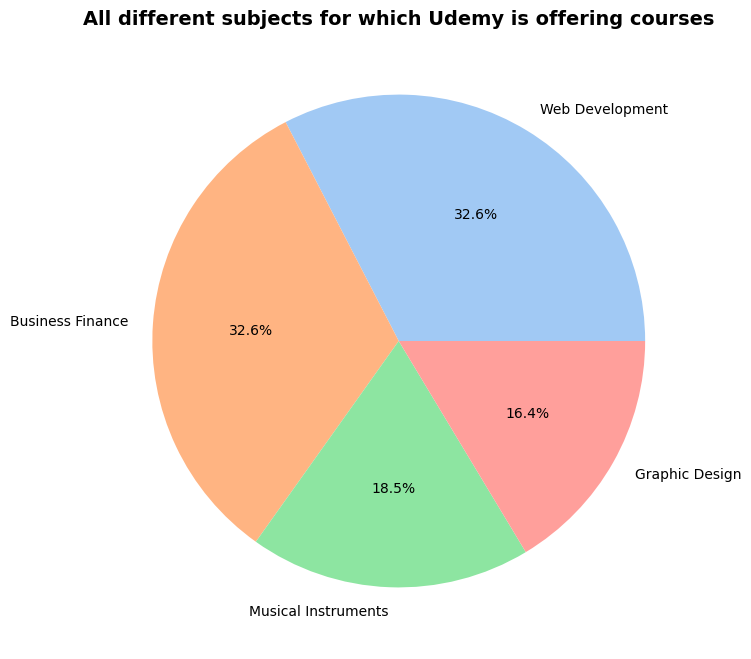

In [44]:
# Đếm số lượng khóa học theo từng subject
subject_counts = data['subject'].value_counts().reset_index()
subject_counts.columns = ["subject", "count"] 

# Tạo bảng màu từ Seaborn
colors = sns.color_palette("pastel", len(subject_counts))

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,8)) #Tạo khung hình vuông
plt.pie(subject_counts["count"], labels = subject_counts["subject"], autopct='%1.1f%%', colors=colors)

# Thêm tiêu đề
plt.title("All different subjects for which Udemy is offering courses",  fontsize=14, fontweight='bold')

# Hiển thị biểu đồ
plt.show()

The pie chart shows that Udemy offers a variety of courses across different subjects, including 'Musical Instruments,' 'Business Finance,' 'Graphic Design,' and 'Web Development'. Moreover, 'Web Development' and 'Business Finance' each account for 32.6%, making up more than two-thirds of all courses on Udemy. Meanwhile, 'Musical Instruments'courses contribute 18.5%, and 'Graphic Design' courses make up 16.4%.

----

### 2. Which subject has the maximum number of courses.

In [142]:
data.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments


In [45]:
data.subject.value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

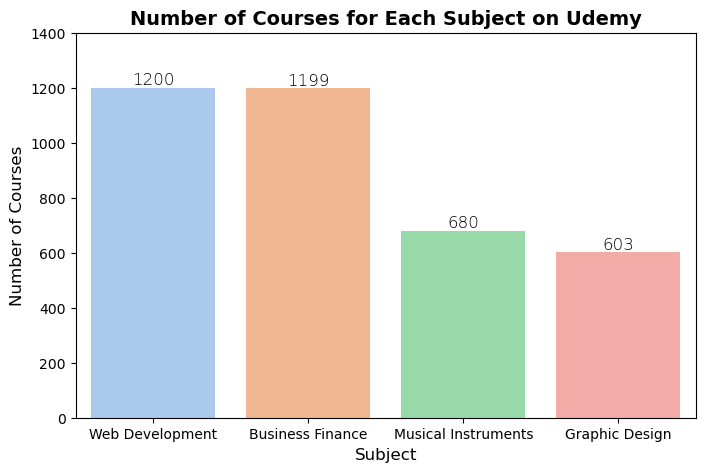

In [46]:
# Đếm số lượng khóa học theo từng subject
subject_counts = data['subject'].value_counts().reset_index()
subject_counts.columns = ["subject", "count"]

# Tạo bảng màu từ Seaborn
colors = sns.color_palette("pastel", len(subject_counts))

# Vẽ biểu đồ cột với Seaborn (sửa lỗi `palette` bằng cách sử dụng `hue=subject`)
plt.figure(figsize=(8,5))
ax = sns.barplot(data=subject_counts, x="subject", y="count", hue="subject", palette=colors, legend=False)

# Hiển thị số lượng khóa học trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='light', color='black')

# Thêm tiêu đề
plt.title("Number of Courses for Each Subject on Udemy", fontsize=14, fontweight='bold')

# Gắn nhãn cho trục
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Number of Courses", fontsize=12)

# Điều chỉnh khoảng cách giữa cột và khung biểu đồ
plt.ylim(0, subject_counts["count"].max() + 200)  # Tăng khoảng cách trên

# Hiển thị biểu đồ
plt.show()

The bar chart shows the number of courses for each subject on Udemy. 'Web Development' has the highest number of courses, with 1,200. Just slightly lower, 'Business Finance' offers 1,199 courses. Meanwhile, 'Musical Instruments' has 680 courses, and 'Graphic Design' has the lowest number, with 603 courses.

----

### 3. Show all the courses which are Free of Cost.

In [60]:
data[(data.is_paid == False)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


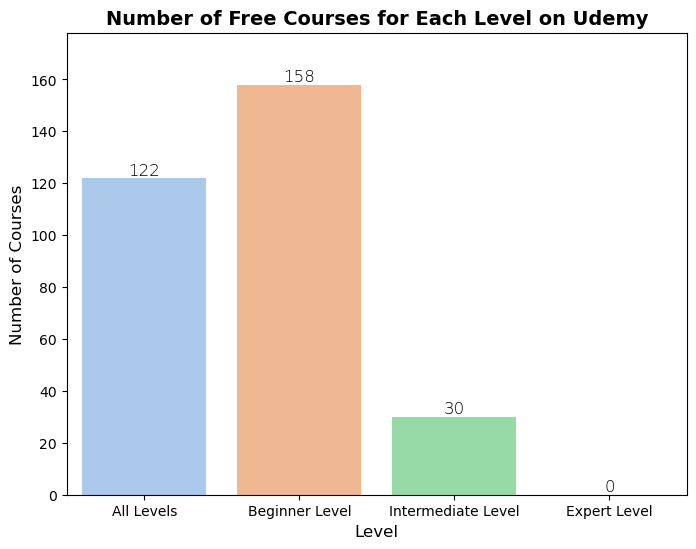

In [72]:
# Đếm số lượng khóa học miễn phí theo từng level
level_counts = data[data.is_paid == False]['level'].value_counts().reset_index()
level_counts.columns = ["level", "count"]

# Đảm bảo tất cả các level xuất hiện (kể cả level có count = 0)
all_levels = ['All Levels', 'Beginner Level','Intermediate Level', 'Expert Level']
for level in all_levels:
    if level not in level_counts["level"].values:
        level_counts = pd.concat([level_counts, pd.DataFrame({"level": [level], "count": [0]})], ignore_index=True)

# Sắp xếp lại thứ tự level
level_counts = level_counts.set_index("level").reindex(all_levels).reset_index()

# Tạo bảng màu chính xác
colors = sns.color_palette("pastel", len(level_counts))

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=level_counts, x="level", y="count", hue="level", palette=colors, legend=False)

# Hiển thị số lượng khóa học trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='light', color='black')

# Thêm tiêu đề
plt.title("Number of Free Courses for Each Level on Udemy", fontsize=14, fontweight='bold')

# Gắn nhãn trục
plt.xlabel("Level", fontsize=12)
plt.ylabel("Number of Courses", fontsize=12)

# Điều chỉnh khoảng cách từ cột đến khung biểu đồ
plt.ylim(0, level_counts["count"].max() + 20)

# Hiển thị biểu đồ
plt.show()

Most free courses target beginners as a way to attract learners. Advanced courses offer more in-depth knowledge and typically require payment.

----

### 4. Show all the courses which are Paid.

In [79]:
data[data.is_paid == True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


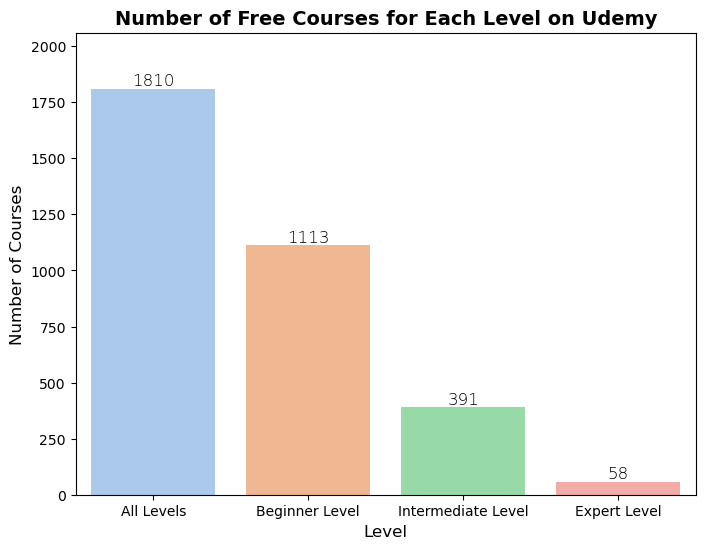

In [78]:
# Đếm số lượng khóa học miễn phí theo từng level
level_counts = data[data.is_paid == True]['level'].value_counts().reset_index()
level_counts.columns = ["level", "count"]

# Đảm bảo tất cả các level xuất hiện (kể cả level có count = 0)
all_levels = ['All Levels', 'Beginner Level','Intermediate Level', 'Expert Level']
for level in all_levels:
    if level not in level_counts["level"].values:
        level_counts = pd.concat([level_counts, pd.DataFrame({"level": [level], "count": [0]})], ignore_index=True)

# Sắp xếp lại thứ tự level
level_counts = level_counts.set_index("level").reindex(all_levels).reset_index()

# Tạo bảng màu chính xác
colors = sns.color_palette("pastel", len(level_counts))

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=level_counts, x="level", y="count", hue="level", palette=colors, legend=False)

# Hiển thị số lượng khóa học trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='light', color='black')

# Thêm tiêu đề
plt.title("Number of Paid Courses for Each Level on Udemy", fontsize=14, fontweight='bold')

# Gắn nhãn trục
plt.xlabel("Level", fontsize=12)
plt.ylabel("Number of Courses", fontsize=12)

# Điều chỉnh khoảng cách từ cột đến khung biểu đồ
plt.ylim(0, level_counts["count"].max() + 250)

# Hiển thị biểu đồ
plt.show()

Most 'All Levels' courses are paid because they offer a well-structured curriculum suitable for learners at different stages.

----

### 5. Which are Top Selling Courses ?

In [148]:
data.sort_values('num_subscribers' , ascending = False)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22T17:14:43Z,Musical Instruments
1267,1258666,Financial Statement Auditing Cycles,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29T23:20:10Z,Business Finance
2070,1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,31 mins,2017-05-16T14:55:28Z,Business Finance
1931,1247992,Introduction to Project Management for Finance...,True,50,0,0,9,Beginner Level,2 hours,2017-07-03T21:40:32Z,Business Finance


### 6. Which are Least Selling Courses ?

In [149]:
data.sort_values('num_subscribers')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance
3259,1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,1.5 hours,2017-06-28T16:05:51Z,Business Finance
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18T17:56:36Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development


### 7. Show all courses of Graphic Design where the price is below 100 ?

In [165]:
#data[(data.subject == 'Graphic Design') & (data.price > '100')]

In [150]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments


In [112]:
data1 = data[data.is_paid==True]
data1.loc[:, 'price'] = data1['price'].astype(int)
data1

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development,2015


In [98]:
data1[(data1.price<100)&(data1.subject=="Graphic Design")]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
20,1165268,15 Motion Graphic Elements in After Effect (S...,True,30,8,0,20,Intermediate Level,3 hours,2017-04-11T04:27:34Z,Graphic Design
35,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,True,20,785,2,29,All Levels,4.5 hours,2017-04-18T16:45:59Z,Graphic Design
39,599652,48 Logo Designs and Techniques,True,20,113,9,48,All Levels,9 hours,2015-09-15T00:23:14Z,Graphic Design
52,794036,8 Stunden professionelles Cinema 4D Training,True,50,18,1,38,All Levels,8.5 hours,2016-03-22T20:51:28Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
3568,133968,Web Elements Design With Photoshop,True,45,5072,38,44,All Levels,5 hours,2014-10-21T19:18:12Z,Graphic Design
3588,1131780,"Whiteboard Animation, Beginner To Expert - In ...",True,20,1343,25,16,All Levels,1 hour,2017-03-14T20:52:30Z,Graphic Design
3639,1122306,Wordpress: Comment utiliser le thème FABLE,True,20,1,0,10,Beginner Level,39 mins,2017-03-07T16:53:27Z,Graphic Design
3671,144222,"YOU can Draw, Shade and Paint a Mixed Media Gi...",True,30,1249,44,19,Beginner Level,3 hours,2014-01-28T02:30:26Z,Graphic Design


----

### 8. List out all the courses that are related with 'Python'.

In [89]:
#data[data.course_title.str.contains('Python')]

In [167]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments


In [103]:
print(', '.join(data[data.course_title.str.contains('Python')]['course_title']))

Advanced Scalable Python Web Development Using Flask, Coding for Entrepreneurs: Learn Python, Django, and More., Complete Python Web Course: Build 8 Python Web Apps, Core: A Web App Reference Guide for Django, Python, and More, Fun and creative web engineering with Python and Web2py, Introduction to QGIS Python Programming, Investment Portfolio Analysis with Python, Learn Python and Django: Payment Processing, Learn Python Django - A Hands-On Course, Learn to code in Python and learn Adobe Photoshop today!, Professional Python Web Development Using Flask, Professional RESTful API Design using Python Flask, Projects in Django and Python, Python Algo Stock Trading: Automate Your Trading!, Python Algo Trading: FX Trading with Oanda, Python Algo Trading: Sentiment Trading with News, Python and Django Full Stack Web Developer Bootcamp, Python for Beginners: Python Programming Language | Tutorial, Python for Finance: Investment Fundamentals & Data Analytics, Python for Trading & Investing, P

----

### 9. What are courses that published in year 2015 ?

In [117]:
#data.dtypes
#data['published_timestamp'] = pd.to_datetime(data.published_timestamp)
#data.dtypes
#data['Year'] = data['published_timestamp'].dt.year
#data[data.Year == 2015]

In [170]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments


In [171]:
data.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [104]:
data['published_timestamp'] = pd.to_datetime(data.published_timestamp)

In [105]:
data.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [108]:
data['Year'] = data['published_timestamp'].dt.year

In [109]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014


In [110]:
data[data.Year == 2015]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
10,591880,1 - Concepts of Statistics For Beginners Step ...,True,200,273,4,15,Beginner Level,31 mins,2015-08-30 22:48:34+00:00,Business Finance,2015
16,302450,10 Numbers Every Business Owner Should Know,True,20,13,1,9,All Levels,1 hour,2015-03-08 19:11:24+00:00,Business Finance,2015
19,384928,101 Blues riffs - learn how the harmonica supe...,True,200,1350,65,55,Intermediate Level,6.5 hours,2015-01-04 21:14:31+00:00,Musical Instruments,2015
23,550842,16 Guitar Chords to Jam With - (Beginner - Int...,True,20,1224,19,20,Beginner Level,1 hour,2015-07-10 19:53:56+00:00,Musical Instruments,2015
26,486240,2 Easy Steps To Investment And Avoiding Traps,True,20,828,1,20,All Levels,1 hour,2015-04-27 23:18:59+00:00,Business Finance,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16 17:07:49+00:00,Musical Instruments,2015
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015


----

### 10. What are the Max. Number of Subscribers for Each Level of courses ?

In [136]:
#data.groupby('level')['num_subscribers'].max()
#data.groupby('level').max()

In [179]:
data.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014


In [180]:
data.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [184]:
data.groupby('level')['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

In [185]:
data.groupby('level').max()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,Year
level,,,,,,,,,,,
All Levels,1277924,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,Free,268923,27445,544,9.5 hours,2017-07-06 21:16:13+00:00,Web Development,2017
Beginner Level,1282064,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,Free,161029,5924,779,9.5 hours,2017-07-06 21:46:30+00:00,Web Development,2017
Expert Level,1275790,[Value Investing] Where White People Keep Thei...,True,95,5172,249,157,9 hours,2017-07-04 18:08:01+00:00,Web Development,2017
Intermediate Level,1276182,株式投資で本当のテクニカル分析ができるようになる,True,Free,29167,3326,320,9.5 hours,2017-07-05 04:41:54+00:00,Web Development,2017


----